# MDI220

# Statistics

# Project


This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.


## Your name: Gabriele LORENZO


## Imports


Please do **not** import any other library.


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [131]:
import seaborn as sns

In [132]:
pd.options.mode.chained_assignment = None # suppress chained assignment warning

## Data


We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**.

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).


In [133]:
# do not modify this cell
filename = "power_consumption.csv"
df = pd.read_csv(filename)

In [134]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [135]:
regions = list(df.region.unique())

In [136]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [137]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [138]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [139]:
# I am adding a new column with the name "winter_year" (i.e.: winter_year=2014 will be the values from december 22nd 2013, to march 21st 2014),
#  in order to simplify data selection in the next points
df["date"] = pd.to_datetime(df["date"])
df["winter_year"] = np.where(
    (df["date"].dt.month == 12) & (df["date"].dt.day >= 22), df["date"].dt.year + 1, df["date"].dt.year
)

In [140]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

df_region

,region,date,consumption,winter_year
7606,Bretagne,2013-01-01,2595,2013
7607,Bretagne,2013-01-02,3195,2013
7608,Bretagne,2013-01-03,3157,2013
7609,Bretagne,2013-01-04,3142,2013
7610,Bretagne,2013-01-05,2859,2013
...,...,...,...,...
11404,Bretagne,2023-05-27,1761,2023
11405,Bretagne,2023-05-28,1610,2023
11406,Bretagne,2023-05-29,1677,2023
11407,Bretagne,2023-05-30,2057,2023


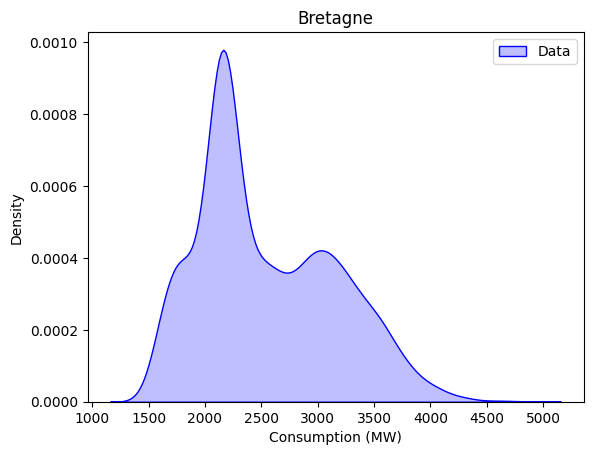

In [141]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color="blue", fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Parameter estimation


In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution.

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:

$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$

The corresponding estimate of the standard deviation is:

$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne.

1. Show that the estimators for the mean and the variance are unbiased.


Your answer:

To show that the estimators are unbiased we need to verify that:

$$E[\hat \mu] - \mu = 0$$

and:

$$E[\hat \sigma^2] - \sigma^2 = 0$$

1. We start with the mean estimator:

$$E[\hat \mu] = \frac 1 n \sum_{i=1}^n E[x_i] = \frac 1 n \cdot n \cdot \mu = \mu \implies E[\hat \mu] - \mu = \mu - \mu = 0$$

hence we have shown that the mean estimator is unbiased.

2. We continue with the standard deviation estimator:

In order to simplify calculation, we rewrite the expression for $\hat{\sigma^2}$ as:
$$\hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2 = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 - 2\hat \mu \sum_{i=1}^n x_i + n\hat \mu^2\bigg) = \newline = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 -2 \hat \mu n \sum_{i=1}^n \frac {x_i} n + n\hat \mu^2\bigg) = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 -2 n \hat \mu^2 + n\hat \mu^2\bigg) = \frac 1 {n-1} \bigg(\sum_{i=1}^n x_i^2 - n\hat \mu^2\bigg)$$

We also calculate $E[\hat\mu^2]$ which will be used in the next calculation:
$$E[\hat \mu^2] = Var(\hat \mu) + E[\hat \mu]^2 = \frac {\sigma^2} n + \mu^2$$

We can now calculate the estimation for $\hat \sigma^2$:
$$E[\hat\sigma^2] = \frac 1 {n-1} \sum_{i=1}^n E[x_i^2] - nE[\hat\mu^2] = \frac 1 {n-1} \sum_{i=1}^n (\sigma^2 + \mu^2) - (\sigma^2 + n\mu^2) = \frac 1 {n-1} (n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2) = \sigma^2$$


2. Give the values obtained for the mean and the standard deviation using these estimators.


In [142]:
mean_estimator = df_region.consumption.sum() / df_region.consumption.count()
var_estimator = ((df_region.consumption - mean_estimator) ** 2).sum() / (df_region.consumption.count() - 1)
std_estimator = np.sqrt(var_estimator)

mean_estimator, std_estimator

(2546.536155666579, 604.9429842099315)

3. Generate new data using the corresponding Gaussian model, with the same number of samples.


In [143]:
num_samples = len(df_region)
new_gaussian = np.random.normal(mean_estimator, std_estimator, num_samples)

4. Plot the _kde_ (kernel density estimate) of real data and the _kde_ of generated data on the same figure.


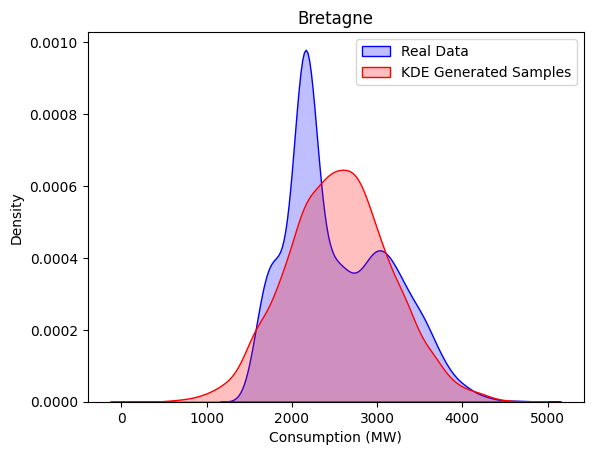

In [144]:
sns.kdeplot(data=df_region, x="consumption", label="Real Data", color="blue", fill=True)
sns.kdeplot(x=new_gaussian, label="KDE Generated Samples", color="red", fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.


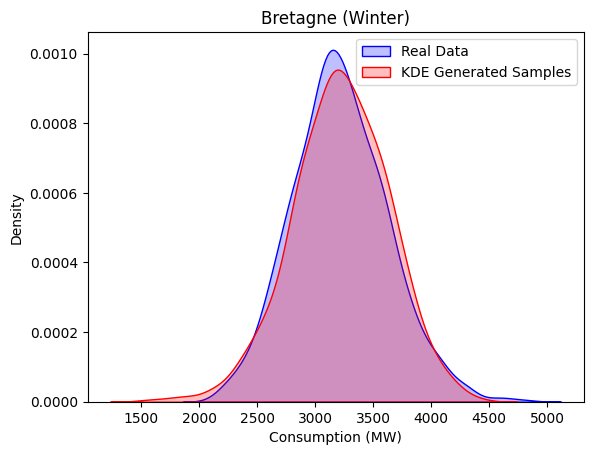

In [145]:
def winter_mask(df, year=None):
    df["date"] = pd.to_datetime(df["date"])

    if year is None:
        winter_mask = (
            ((df["date"].dt.month == 12) & (df["date"].dt.day >= 22))
            | (df["date"].dt.month <= 2)
            | ((df["date"].dt.month == 3) & (df["date"].dt.day <= 21))
        )
    else:
        winter_mask = (
            ((df["date"].dt.month == 12) & (df["date"].dt.day >= 22))
            | (df["date"].dt.month <= 2)
            | ((df["date"].dt.month == 3) & (df["date"].dt.day <= 21))
        ) & (df["winter_year"] == year)

    return winter_mask


df_region_winter = df_region[winter_mask(df_region)]

# update the model parameters
mean_estimator_winter = df_region_winter.consumption.sum() / df_region_winter.consumption.count()
var_estimator_winter = ((df_region_winter.consumption - mean_estimator_winter) ** 2).sum() / (
    df_region_winter.consumption.count() - 1
)
std_estimator_winter = np.sqrt(var_estimator_winter)

num_samples = len(df_region_winter)
new_gaussian = np.random.normal(mean_estimator_winter, std_estimator_winter, num_samples)

sns.kdeplot(data=df_region_winter, x="consumption", label="Real Data", color="blue", fill=True)
sns.kdeplot(x=new_gaussian, label="KDE Generated Samples", color="red", fill=True)
plt.title(str(region) + " (Winter)")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

6. In which case the Gaussian model seems more appropriate?


The Gaussian model seems more appropriate in the "winter" case. We can see that the gaussian distribution, created from the estimator parameters, approximate well the real distribution.
This is not the case for the whole Bretagne data as the real data is not distributed uniformly.


## B. Goodness of fit


We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):

$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$


1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.


Your answer:

**Proof that $d(f, g)$ is in the range $[0, 1]$:**

- To show that d(f, g) is non-negative, we note that the integral of the absolute value is always non-negative, so d(f, g) is greater than or equal to 0.

- To demonstrate that d(f, g) is less than or equal to 1, we can utilize the triangle inequality for integrals, which yields:

$$\int |f(x) - g(x)| dx ≤ \int |f(x)| dx + \int |g(x)| dx$$

Since f(x) and g(x) are probability density functions (PDFs), the integral of any PDF is always equal to 1. Therefore:

$$\int |f(x) - g(x)| dx ≤ 1 + 1 = 2$$

Substituting this result back into the formula for d(f, g):

$$d(f, g) = 1/2 \int |f(x) - g(x)| dx ≤ 1/2 * 2 = 1$$

**Proof that $d(f, g) = 0$ if and only if $f = g$ almost everywhere (for the Lebesgue measure):**

- Define three sets: A, B, and C:
$$A = {x ∈ ℝ | f(x) > g(x)}\\
B = {x ∈ ℝ | f(x) < g(x)}\\
C = {x ∈ ℝ | f(x) = g(x)}$$

Now, we can express the integral of $|f(x) - g(x)|$ as:

$$\int |f(x) - g(x)| dx = \int_A (f(x) - g(x)) dx + \int_B (g(x) - f(x)) dx + \int_C 0 dx$$

If $d(f, g) = 0$, then $\int |f(x) - g(x)| dx = 0$, and therefore:

$$\int_A (f(x) - g(x)) dx = -\int_B (g(x) - f(x)) dx$$

Since both integrals are non-negative, A and B must be empty sets. Thus, $f(x) = g(x)$ almost everywhere.

**Proof that $d(f, g) = 1$ if and only if $f$ and $g$ have disjoint supports:**

- Define three sets: A, B, and C:

$$A = {x ∈ ℝ | f(x) > 0}\\
B = {x ∈ ℝ | g(x) > 0}\\
C = A ∩ B$$

We want to show that $d(f, g) = 1$, so we have:

$$1 = 1/2 \int_A |f(x) - g(x)| dx + 1/2 \int_B |f(x) - g(x)| dx - 1/2 \int_C |f(x) - g(x)| dx$$

Since each of the three integrals is less than or equal to 0.5, the equation simplifies to:

$$1 = 0.5 + 0.5 - \int_C |f(x) - g(x)| dx$$

The only solution to this equation is:

$$\int_C |f(x) - g(x)| dx = 0$$

As shown before, there are two possibilities for this integral to be zero:
1. $f(x) = g(x)$ almost everywhere for all x in C.
2. C is an empty set ($C = ∅$).

However, when considering $C ≠ ∅$:
Since we know that $\int_A f(x) dx = 1$ and defining the set $D = A - C$, we have $D ⊆ A$ and $D ≠ A$.
This leads to:
$$\int_A |f(x) - g(x)| dx = \int_D f(x) dx$$

As $D ⊆ A$:
$$\int_D f(x) dx < \int_A f(x) dx = 1$$

Therefore, $\int_A |f(x) - g(x)| dx < 1$. In conclusion, the only conceivable solution for the integral of $|f(x) - g(x)|$ over C resulting in 0 is when and only when C is an empty set, denoted as $C = ∅$. In this case, the functions $f(x)$ and $g(x)$ have disjoint supports.

2. For the region Bretagne, compute the dissimilarity between the _kde_ of real data and the density of the Gaussian model.


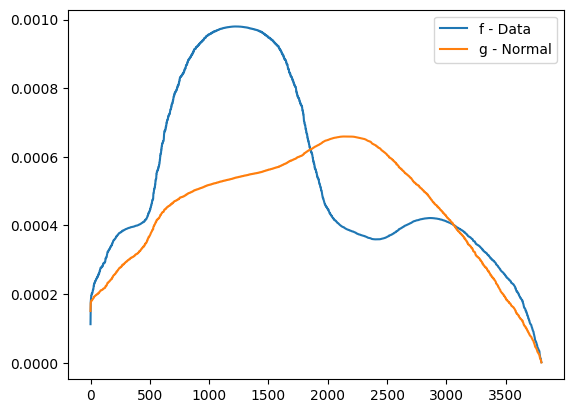

0.3647953815716011

In [146]:
def compute_dissimilarity(data, plot=False):
    x_values = data.sort_values()

    mean_estimator = data.sum() / data.count()
    std_estimator = np.sqrt(((data - mean_estimator) ** 2).sum() / (data.count() - 1))

    f = gaussian_kde(data).pdf(x_values)
    g = norm.pdf(x_values, loc=mean_estimator, scale=std_estimator)

    if plot == True:
        plt.plot(f, label="f - Data")
        plt.plot(g, label="g - Normal")

        plt.legend()
        plt.show()

    d = 0.5 * np.sum(np.abs(f - g))
    return d


d = compute_dissimilarity(df_region.consumption, plot=True)
d

3. Do the same for the region Bretagne in winter and check your conclusion of part A.


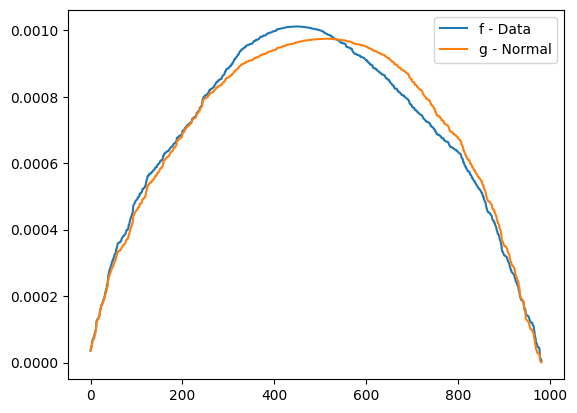

0.016703433982206816

In [147]:
compute_dissimilarity(df_region_winter.consumption, plot=True)

4. Do the same for all regions. Give the result as a single dataframe.


In [148]:
# compute the dissimilarity for each region in all year
df_d = df.groupby("region").apply(lambda x: compute_dissimilarity(x.consumption))
df_d = pd.DataFrame(df_d, columns=["dissimilarity"])
df_d

,dissimilarity
region,
Auvergne-Rhône-Alpes,0.115859
Bourgogne-Franche-Comté,0.229804
Bretagne,0.364795
Centre-Val de Loire,0.409516
Grand Est,0.109481
Hauts-de-France,0.121480
Normandie,0.273439
Nouvelle-Aquitaine,0.250032
Occitanie,0.291401


5. Which region is best fitted by a Gaussian model in winter?


In [149]:
# First compute the dissimilarity for each region in winter, than select the best
df_winter = df[winter_mask(df)]

df_d_winter = df_winter.groupby("region").apply(lambda x: compute_dissimilarity(x.consumption))
df_d_winter = pd.DataFrame(df_d_winter, columns=["dissimilarity"])
name_best_fitted = df_d_winter.sort_values(by="dissimilarity", ascending=True).index[0]
d_best_fitted = df_d_winter.sort_values(by="dissimilarity", ascending=True).iloc[0, 0]
name_best_fitted, d_best_fitted

('Hauts-de-France', 0.007846088908650208)

6. For this region and this season, plot the _kde_ of real data and the _kde_ of generated data on the same figure, as in part A.


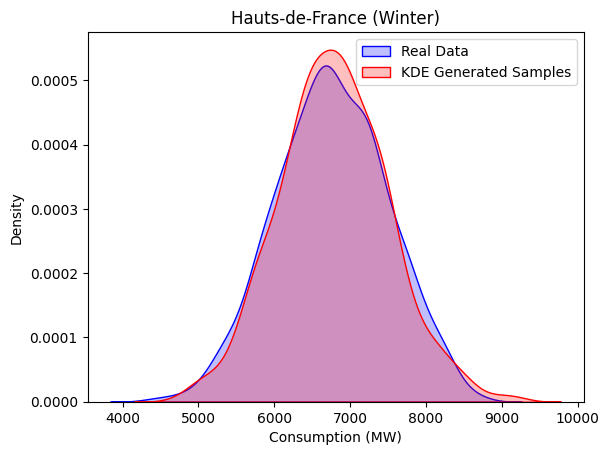

In [150]:
df_best_fitted = df[df.region == name_best_fitted]
df_best_fitted_winter = df_best_fitted[winter_mask(df_best_fitted)]

mean_estimator_winter = df_best_fitted_winter.consumption.sum() / df_best_fitted_winter.consumption.count()
var_estimator_winter = ((df_best_fitted_winter.consumption - mean_estimator_winter) ** 2).sum() / (
    df_best_fitted_winter.consumption.count() - 1
)
std_estimator_winter = np.sqrt(var_estimator_winter)

num_samples = len(df_best_fitted_winter)
new_gaussian = np.random.normal(mean_estimator_winter, std_estimator_winter, num_samples)

sns.kdeplot(data=df_best_fitted_winter, x="consumption", label="Real Data", color="blue", fill=True)
sns.kdeplot(x=new_gaussian, label="KDE Generated Samples", color="red", fill=True)
plt.title(str(name_best_fitted) + " (Winter)")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## C. Bayesian statistics


We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma$=400MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0$=3500MW and standard deviation $\sigma_0$=500MW.

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.


The posterior distribution of $\mu$ is:

$$\pi (\mu|X) \text{\textasciitilde} \mathcal{N}(\mu_n, \sigma_n^2)$$

with:

$$\sigma_n^2 = \frac 1 {\frac 1 {\sigma_0^2} + \frac n {\sigma^2} }$$

$$\mu_n = \sigma_n^2 (\frac {\mu_0} {\sigma_0^2} + \frac {\sum_{i=1}^n x_i} {\sigma^2})$$

With $X = x_1,\ldots,x_n$.


2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.


We want to estimate the posterior distribution of data. Normally we would need $\mu$ and $\sigma$. In our case we only know $\sigma$, but as shown before, we have a posterior distribution of the unknown mean.

We are going to use the posterior distribution of $\mu$ to estimate the posterior distribution of the data, using a posterior predictive model:

$$p(x'|X) = \int p(x', \mu | X) \mathrm{d}\mu = \int p(x'| \mu, X) \pi(\mu | X) \mathrm{d}\mu = \int p(x'|\mu) \pi(\mu|X) \mathrm{d}\mu = \int \mathcal N (x'|\mu, \sigma^2)\mathcal N (\mu|\mu_n, \sigma_n^2)\mathrm{d}\mu = \mathcal N (x'|\mu_n, \sigma_n^2 + \sigma^2)$$

We can treat the last integral as a sum of two Normal, which will result in a Normal with mean equal to the sum of means and variance equal to sum of the variances.

In [151]:
# known std of data
std = 400
var = std**2

# know prior parameters of mu
mean_0 = 3500
std_0 = 500
var_0 = std_0**2

df_yearly_data = pd.DataFrame(columns=["winter_year", "posterior predictive mean", "posterior predictive var"])

for winter_year, df_year in df_region_winter.groupby(df_region_winter["winter_year"]):
    n = df_year.consumption.count()
    s = df_year.consumption.sum()

    # we compute the posterior distribution parameters for mu
    var_post_mu = 1 / (1 / var_0 + n / var)
    mean_post_mu = var_post_mu * (mean_0 / var_0 + s / var)

    # we compute the posterior predictive distribution for data
    mean_post_pred = mean_post_mu
    var_post_pred = var_post_mu + std**2

    df_yearly_data.loc[len(df_yearly_data)] = [winter_year, mean_post_pred, var_post_pred]

df_yearly_data["winter_year"] = df_yearly_data["winter_year"].astype(int)

df_yearly_data

,winter_year,posterior predictive mean,posterior predictive var
0,2013,3395.176091,161984.126984
1,2014,3095.134598,161765.225066
2,2015,3229.578553,161765.225066
3,2016,3133.762549,161745.962462
4,2017,3275.816417,161765.225066
5,2018,3328.695940,161765.225066
6,2019,3179.931598,161765.225066
7,2020,3124.061545,161745.962462
8,2021,3360.657546,161765.225066
9,2022,3216.041483,161765.225066


3. Plot the density of the posterior distribution in 2023 and the _kde_ of real data in 2023 on the same plot.


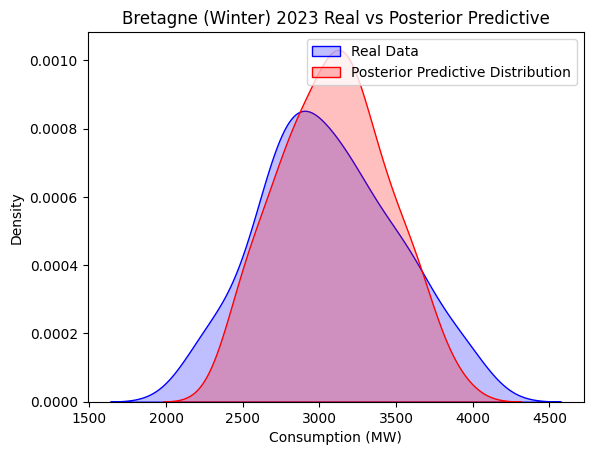

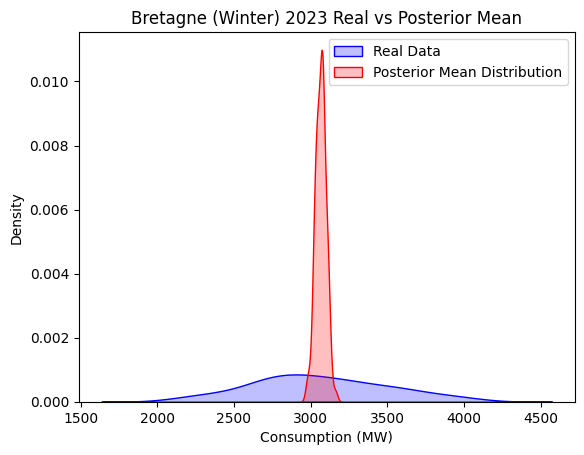

In [152]:
posterior_2023 = df_yearly_data[df_yearly_data.winter_year == 2023]
df_region_winter_2023 = df_region[winter_mask(df_region, year=2023)]

num_samples = len(df_region_winter_2023)
posterior_guassian_data = np.random.normal(
    posterior_2023["posterior predictive mean"], np.sqrt(posterior_2023["posterior predictive var"]), num_samples
)

# plot the posterior predictive distribution of data (winter 2023)
sns.kdeplot(data=df_region_winter_2023, x="consumption", label="Real Data", color="blue", fill=True)
sns.kdeplot(data=posterior_guassian_data, label="Posterior Predictive Distribution", color="red", fill=True)
plt.title(str(region) + " (Winter) 2023 Real vs Posterior Predictive")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

posterior_mean_data = np.random.normal(
    posterior_2023["posterior predictive mean"],
    np.sqrt(posterior_2023["posterior predictive var"] - std**2),
    num_samples,
)

# plot the posterior mean distribution of data (winter 2023)
sns.kdeplot(data=df_region_winter_2023, x="consumption", label="Real Data", color="blue", fill=True)
sns.kdeplot(data=posterior_mean_data, label="Posterior Mean Distribution", color="red", fill=True)
plt.title(str(region) + " (Winter) 2023 Real vs Posterior Mean")
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

This second plot shows the posterior distribution of the mean (in winter 2023) against the real data (in winter 2023). We can see that the posterior distribution of the mean is a good approximation of the mean of real data.

4. Discuss the results, comparing to those obtained in part A.


Your answer:

We can see that, comparing the plots C.3.1 and the plot in part A, the estimation in part A is more accurate. This is due to the fact that, in part C.3, we are using a posterior distribution to generate the data upon which we draw the gaussian kde, while in part A we use estimators to generate the data. The estimators are more accurate than the posterior distribution, as they are calculated using the real data.

## D. Hypothesis testing


Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.

1. Propose a statistical test at level $\alpha$.


Your answer:

The variance is unknown, hence:

$$P_{\theta} \text{\textasciitilde} \Nu(\mu, \theta)$$

We have that the null hypothesis is $H_0 = \{\theta_{0}\}$ and the alternative hypothesis is $H_1 = \{\theta_{1}\}$, with $\theta_{0} = 400 MW$ and $\theta_{1} = 500MW.$

Following the simple hypothesis model we have:

$$\frac {p_1(x)} {p_0(x)} \propto \exp^{\frac {1} {2} (\frac {1} {\theta_{0}^2} - \frac {1} {\theta_{1}^2}) S}\space\space\space with \space S = \sum_{i=1}^n (x_i - \mu)^2$$

Since $\theta_{1} \gt \theta_{0}$, a UMP test is given by:

$$\delta(x)=\mathbf{1}_{\{S \gt c\}}\space\space\space\space for\space c \gt 0$$

We can approximate $S$ with:
$$S\text{\textasciitilde}\theta^2 Z\space\space\space\space with\space Z\text{\textasciitilde}\chi^2(n)$$

Then we have:
$$\alpha = P_0 (S \gt c) = P_0 (\theta^2 Z \gt c)=P_0 (Z \gt \frac c {\theta^2})$$

Finally we can calculate $c$ as:
$$\frac{c}{\theta_0^2} = Q_{\chi^2(n)}{(1-\alpha)} \implies c = \theta_0^2 Q_{\chi^2(n)}{(1-\alpha)}$$



2. Provide the result of this test for $\alpha=1\%$.


S = 18736029
c = 19858610.989779405
Reject H0? False


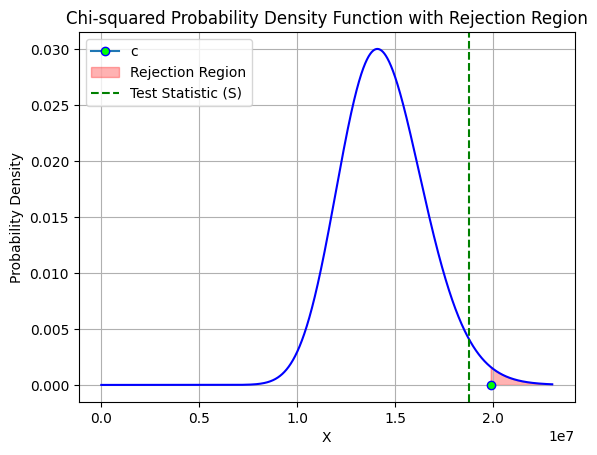

In [153]:
alpha = 0.01
mean = 3200
sigma_0 = 400
n = len(df_region_winter_2023)

S = ((df_region_winter_2023.consumption - mean) ** 2).sum()
c = (sigma_0**2) * chi2.ppf(1 - alpha, df=n)

print("S =", S)
print("c =", c)
reject = S > c
print("Reject H0?", reject)

# plot the chi-squared pdf and the rejection region
x = np.linspace(0, 23000000, 10000)
pdf = chi2.pdf(x / (sigma_0**2), df=n)

plt.plot(x, pdf, color="b")
plt.plot(c, chi2.pdf(c, df=n), marker="o", markerfacecolor="lime", markeredgecolor="blue", label="c")
plt.fill_between(x, pdf, where=(x > c), color="red", alpha=0.3, label="Rejection Region")
plt.axvline(S, color="green", linestyle="dashed", label="Test Statistic (S)")
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-squared Probability Density Function with Rejection Region")
plt.legend()
plt.grid(True)

plt.show()

## E. Testing independence


Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter.


1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.


,Bretagne winter consumption,Provence winter consumption
Bretagne winter consumption,1.00000,0.71678
Provence winter consumption,0.71678,1.00000


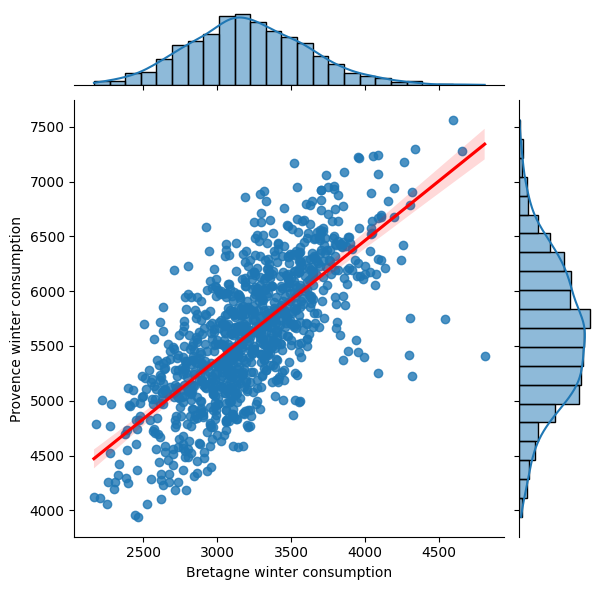

In [154]:
# rename bretagne winter dataframe
df_bretagne_winter = df_region_winter

# select Provence-Alpes-Côte d'Azur data
df_paca = df[df.region == "Provence-Alpes-Côte d'Azur"]

df_paca_winter = df_paca[winter_mask(df_paca)]

df_region_winter_comparison = pd.DataFrame(
    {
        "Bretagne winter consumption": df_bretagne_winter.reset_index(drop=True).consumption,
        "Provence winter consumption": df_paca_winter.reset_index(drop=True).consumption,
    }
)

sns.jointplot(
    df_region_winter_comparison,
    x="Bretagne winter consumption",
    y="Provence winter consumption",
    kind="reg",
    joint_kws={"line_kws": {"color": "red"}},
)

df_region_winter_comparison.corr()

2. Do you think the power consumption in these two regions is independent?


No, I don't think the two power consumptions are independent, since the correlation is fairly high: $0.716$.


3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.

Your answer:

We have two hypothesis: $H_0 = \{X \perp Y\}$ and $H_1 = \{X \not\perp Y\}$.

In other words, we would like to test the independence between X and Y, where X and Y are the winter consumption data of Bretagne and Provence-Alpes-Côte d'Azur.

We start choosing two partitions of the value spaces: $A_1, ..., A_K\space and \space B_1, ..., B_L$

Then we define:

$$N_{ij} = \sum_{t=1}^n \mathbf 1_{\{X_t \in A_i, Y_t \in B_j\}}\space\space N_i = \sum_{t=1}^n \mathbf 1_{\{X_t \in A_i\}}\space\space N_j = \sum_{t=1}^n \mathbf 1_{\{Y_t \in B_j\}}$$

We define the following function:

$$T(X, Y) = \sum_{i,j}{\frac{(N_{ij}-\frac{N_{i}N_{j}}{n})^2}{\frac{N_{i}N_{j}}{n}}}\sim\chi^2((K-1)(L-1)) \space \text{ when } n \to \infty$$

The test is then:

$$\delta(x)=\mathbf{1}_{\{T(X, Y) \gt c\}}$$

The independence is rejected when $T(X, Y) \gt c$.

For a test at level $\alpha$, we have:

$$\alpha = P_0(T(X, Y) \gt c)$$

For large n, we can approximate the distribution of $T(X, Y)$ with a $\chi^2$ distribution with $(K-1)(L-1)$ degrees of freedom.

So,
$$c = Q_{\chi^2((K-1)(L-1))}{(1-\alpha)}$$

4. Give the result of this test for $\alpha=1\%$.


In [155]:
alpha = 0.01
K = 10
L = 10

c = chi2.ppf(1 - alpha, df=(K - 1) * (L - 1))

min_val_1 = min(df_bretagne_winter.consumption)
max_val_1 = max(df_bretagne_winter.consumption)
min_val_2 = min(df_paca_winter.consumption)
max_val_2 = max(df_paca_winter.consumption)

# Calculate the 2D histogram
values = np.histogram2d(
    df_bretagne_winter["consumption"],
    df_paca_winter["consumption"],
    bins=[K, L],  # Use K and L as the number of bins
    range=((min_val_1, max_val_1), (min_val_2, max_val_2)),
)[0]

ni = values.sum(axis=1)
nj = values.sum(axis=0)
n = values.sum()
T = 0

for i in range(values.shape[0]):
    for j in range(values.shape[1]):
        x = ((values[i][j] - (ni[i] * nj[j]) / n) ** 2) / ((ni[i] * nj[j]) / n)
        T += x

print("T(x) =", T)
print("c =", c)
reject = T > c
print("Reject H0?", reject)

T(x) = 1072.4504724723213
c = 113.51241047036046
Reject H0? True


## F. Confidence intervals


Consider the region Bretagne in winter.

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.


Confidence Interval at alpha = 95%: [3188.5358856463263, 3239.820529832289]


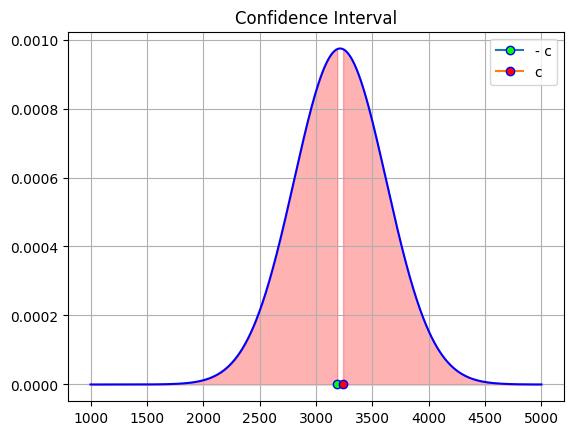

In [156]:
n = len(df_bretagne_winter)
alpha = 0.05

c = t.ppf(1 - alpha / 2, df=n - 1)
x_bar = df_bretagne_winter.consumption.mean()
v_0 = 1 / (n - 1) * ((df_bretagne_winter.consumption - x_bar) ** 2).sum()  # unbiased variance estimator

print("Confidence Interval at alpha = 95%:", [x_bar - c * np.sqrt(v_0 / n), x_bar + c * np.sqrt(v_0 / n)])

# plot the chi-squared pdf and the rejection region
c_1 = x_bar - c * np.sqrt(v_0 / n)
c_2 = x_bar + c * np.sqrt(v_0 / n)

x = np.linspace(1000, 5000, 5000)

plt.plot(c_1, t.pdf(c_1, df=n - 1), marker="o", markerfacecolor="lime", markeredgecolor="blue", label="- c")
plt.plot(c_2, t.pdf(c_2, df=n - 1), marker="o", markerfacecolor="red", markeredgecolor="blue", label="c")
plt.plot(x, t.pdf(x, df=n - 1, loc=x_bar, scale=np.sqrt(v_0)), color="b")
plt.fill_between(x, t.pdf(x, df=n - 1, loc=x_bar, scale=np.sqrt(v_0)), where=(x < c_1), color="red", alpha=0.3)
plt.fill_between(x, t.pdf(x, df=n - 1, loc=x_bar, scale=np.sqrt(v_0)), where=(x > c_2), color="red", alpha=0.3)
plt.title("Confidence Interval")
plt.legend()
plt.grid(True)

plt.show()

2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.


In [157]:
H_0 = 3100
alpha = 0.05

n = len(df_region_winter_2023)
c = t.ppf(1 - alpha / 2, df=n - 1)
x_bar = df_region_winter_2023.consumption.mean()
v_0 = 1 / (n - 1) * ((df_region_winter_2023.consumption - x_bar) ** 2).sum()  # unbiased variance estimator

reject = np.abs(x_bar - H_0) > c * np.sqrt(v_0 / n)

print(np.abs(x_bar - H_0))
print(c * np.sqrt(v_0 / n))
print("Reject H0?", reject)

41.9666666666667
91.32808476401166
Reject H0? False
